# CS7641 Machine Learning

### Assignment 1 - Supervised Learning
### Author: Vivek Agrawal

This file will provide analysis of 5 different machine learning algorithms for 2 different datasets.

* Decision trees with some form of pruning
* Neural networks
* Boosting
* Support Vector Machines
* k-nearest neighbors

### References
* https://medium.com/thalus-ai/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b
* https://becominghuman.ai/understand-classification-performance-metrics-cad56f2da3aa
* https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3
* https://www.dataquest.io/blog/learning-curves-machine-learning/



## 1. Data Sets Used
First step in the process is to load all the datasets
1. https://archive.ics.uci.edu/ml/datasets/Census+Income
2. https://archive.ics.uci.edu/ml/datasets/Phishing+Websites


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, scale


def gtid():
    return 903471711 

def author(self):
    return 'vagrawal63'	

  
def get_income_data(file_name = "adult.csv"):
    data = pd.read_csv(file_name)
    #clean rows with empty values 
    data = data[data.occupation.str.strip() != '?']
    data = data[data.workclass.str.strip() != '?']
    data = data[data.nativecountry.str.strip() != '?']
    #convert income to binary classes
    def func(x):
        if(x == " <=50K" or x == " <=50K."):
            return 0
        elif(x == " >50K" or x == ' >50K.'):
            return 1
    data['income'] = data['income'].apply(func)
    #print(data.head())
    result = data['income']
    del data['income']
    del data['education']
    del data['fnlwgt']
    #testing if I want to delete these additional columns
    # result: Tree size drops from Cleaned: (45222, 486) to (45222, 268)
    # accuracy drops from Accuracy of tree (No pruning):0.823377120460988 to 0.7842997385726206
    del data['capitalgain']
    del data['capitalloss']
    #encode to binary values
    #enc = OneHotEncoder(sparse = False, handle_unknown='ignore')
    #data = enc.fit_transform(data)
    data = pd.get_dummies(data, columns=['workclass','maritalstatus','occupation',
                                         'relationship','race',
                                         'gender','nativecountry'])
    
    #print(enc.categories_)
    data = scale(data)
    return data, result


#randomize using GT ID
np.random.seed(gtid())
#Read Data File
income_data, result = get_income_data()
print("Cleaned: " + str(income_data.shape))


Cleaned: (45222, 85)


## 2. Plotting Methods
The sections below contain various plotting methods to be used throughout the assignment

In [2]:
from matplotlib import pyplot as plt

def plot_learning_curve(train_sizes, train_scores, validation_scores, title, xlabel = "Dataset Size"):

    plt.ylim((0.0, 0.25))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Error")
    series1_mean = (1 - train_scores).mean(axis = 1)
    series1_std = (1 - train_scores).std(axis = 1)
    series2_mean = (1 - validation_scores).mean(axis = 1)
    series2_std = (1 - validation_scores).std(axis = 1)
    plt.fill_between(train_sizes, series1_mean - 2*series1_std, series1_mean + 2*series1_std, alpha=0.2, color="b")
    plt.fill_between(train_sizes, series2_mean - 2*series2_std, series2_mean + 2*series2_std, alpha=0.2, color="g")
    plt.plot(train_sizes, series1_mean, 'o-', color='b', label = "Training Error", lw=2)
    plt.plot(train_sizes, series2_mean, 'o-', color='g', label = "Cross-Validation Error", lw=2)
    plt.legend(loc="best")
    plt.grid(True, linestyle = "--")
    plt.show()

    
def plot_validation_curve(param_range, train_scores, test_scores, title, xlabel):
    train_scores_mean = (1 - train_scores).mean(axis = 1)
    train_scores_std = (1 - train_scores).std(axis = 1)
    test_scores_mean = (1 - test_scores).mean(axis = 1)
    test_scores_std = (1 - test_scores).std(axis = 1)

    print(xlabel , param_range[np.ndarray.argmin(test_scores_mean)])
    print("CV Error: " , test_scores_mean[np.ndarray.argmin(test_scores_mean)])

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Error")
    plt.fill_between(param_range, train_scores_mean - 2*train_scores_std, train_scores_mean + 2*train_scores_std, alpha=0.2, color="b")
    plt.fill_between(param_range, test_scores_mean - 2*test_scores_std, test_scores_mean + 2*test_scores_std, alpha=0.2, color="g")
    plt.plot(param_range, train_scores_mean, color='b', label = "Training Error", lw=2)
    plt.plot(param_range, test_scores_mean, color='g', label = "Cross-Validation Error", lw=2)
    plt.legend(loc="best")
    plt.grid(True, linestyle = "--")
    plt.show()

## 3. Imports and other utility methods
This section has imports, data split and other utility methods for final classifier evaluation

In [3]:
from sklearn.model_selection import learning_curve, validation_curve, train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold, ShuffleSplit, KFold
from sklearn.metrics import make_scorer, confusion_matrix, accuracy_score, precision_score, classification_report
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from sklearn.model_selection import  cross_val_score
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from timeit import default_timer as timer


def evaluate_tuned_classifier(classifier, X_train, Y_train, X_test, Y_test, name):
    
    start = timer()
    classifier.fit(X_train, Y_train)
    end = timer()
    training_time = end - start
    
    start = timer()
    Y_predict = classifier.predict(X_test)
    end = timer()
    prediction_time = end - start
    
    
    c_matrix = confusion_matrix(Y_test, Y_predict)
    acc_score = accuracy_score(Y_test, Y_predict)
    p_score = precision_score(Y_test, Y_predict)
    r_score = recall_score(Y_test, Y_predict)
    f_score = f1_score(Y_test, Y_predict)
    roc_score = roc_auc_score(Y_test, Y_predict)
    
    
    print("Training Time (s)  : ", "{:.4f}".format(training_time))
    print("Prediction Time (s): ", "{:.4f}".format(prediction_time))
    print("-"*30)
    
    print("Confusion Matrix: \n", c_matrix)
    print("Accuracy  : ", "{:.4f}".format(acc_score))
    print("Precision : ", "{:.4f}".format(p_score))
    print("Recall    : ", "{:.4f}".format(r_score))
    print("F1        : ", "{:.4f}".format(f_score))
    print("AUC       : ", "{:.4f}".format(roc_score))
    
    #print("Classification Report: \n", classification_report(Y_test, Y_predict))
    #plot_confusion_matrix(cm, )


print("Split data")
#split data
X_train, X_test, Y_train, Y_test = train_test_split(income_data, result, test_size  = 0.3)
print("X_train: " + str(X_train.shape))

Split data
X_train: (31655, 85)


### Classifier 1 : Decision Trees with Pruning
Steps in the process:
* Create the learning curves using test data and cross-validation (unpruned and non-optimized)
* Create Validation curves on 2 hyper parameters to find the best hyper parameter value
* Recreate the Learning Curve with the correct values of the hyper parameters
* After tuning the classifier using the two found hyper-parameters, use the classifier to predict the results and collect metrics 

In [4]:
print("Decision Tree: Create Learning Curves")
dtree_classifier = DecisionTreeClassifier()
cv = KFold(n_splits = 5, shuffle = True)
dt_lc1_train_sizes, dt_lc1_train_scores, dt_lc1_validation_scores = learning_curve(
    dtree_classifier, X_train, Y_train, train_sizes = np.linspace(0.05, 1.0, 20), 
    cv = cv, scoring = make_scorer(accuracy_score), n_jobs=4)
print("Decision Tree: Done with learning curve")


Decision Tree: Create Learning Curves
Decision Tree: Done with learning curve


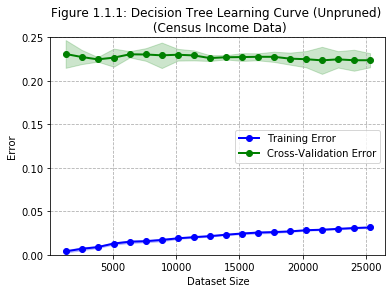

In [5]:
plot_learning_curve(dt_lc1_train_sizes, dt_lc1_train_scores, dt_lc1_validation_scores, 
                    "Figure 1.1.1: Decision Tree Learning Curve (Unpruned) \n (Census Income Data)")

In [6]:
print("Decision Tree: Tuning Hyper Param: Max Depth")
#randomize using GT ID
np.random.seed(gtid())
dtree_classifier = DecisionTreeClassifier()
dt_hp1_param_range = np.arange(3, 20) 
cv = KFold(n_splits = 5, shuffle = False)
dt_hp1_train_scores, dt_hp1_test_scores = validation_curve(dtree_classifier, X_train, Y_train, param_name = "max_depth", 
                                             param_range = dt_hp1_param_range, cv = cv, scoring = make_scorer(accuracy_score), n_jobs=4)

print("Decision Tree: Done tuning Hyper Param: Max Depth")


Decision Tree: Tuning Hyper Param: Max Depth
Decision Tree: Done tuning Hyper Param: Max Depth


Hyperparameter: Max Tree Depth 8
CV Error:  0.17377981361554257


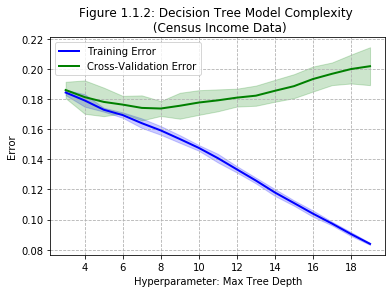

In [7]:
plot_validation_curve(dt_hp1_param_range, dt_hp1_train_scores, dt_hp1_test_scores, 
                      "Figure 1.1.2: Decision Tree Model Complexity \n (Census Income Data)", "Hyperparameter: Max Tree Depth")

In [8]:
print("Decision Tree: Tuning Hyper Param: min_samples_split")
#randomize using GT ID
np.random.seed(gtid())
dtree_classifier = DecisionTreeClassifier()
dt_hp2_param_range = np.arange(100, 1000, 50) 
cv = KFold(n_splits = 5, shuffle = False)
dt_hp2_train_scores, dt_hp2_test_scores = validation_curve(dtree_classifier, X_train, Y_train, param_name = "min_samples_split", 
                                             param_range = dt_hp2_param_range, cv = cv, scoring = make_scorer(accuracy_score), n_jobs=4)

print("Decision Tree: Done tuning Hyper Param: min_samples_split")

Decision Tree: Tuning Hyper Param: min_samples_split
Decision Tree: Done tuning Hyper Param: min_samples_split


Hyperparameter: Minimum Samples Split 200
CV Error:  0.17156847259516667


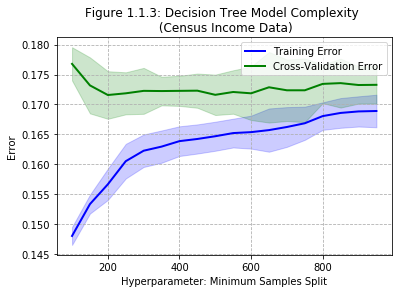

In [9]:
plot_validation_curve(dt_hp2_param_range, dt_hp2_train_scores, dt_hp2_test_scores, 
                      "Figure 1.1.3: Decision Tree Model Complexity \n (Census Income Data)", 
                      "Hyperparameter: Minimum Samples Split")

In [10]:
print("Create Learning Curve on Pruned Tree")
dtree_classifier = DecisionTreeClassifier(max_depth = 8, min_samples_split = 200)
cv = KFold(n_splits = 5, shuffle = True)
dt_lc2_train_sizes, dt_lc2_train_scores, dt_lc2_validation_scores = learning_curve(
    dtree_classifier, X_train, Y_train, train_sizes = np.linspace(0.05, 1.0, 20), cv = cv, scoring = make_scorer(accuracy_score), n_jobs=4)
print("Done with learning curve")

Create Learning Curve on Pruned Tree
Done with learning curve


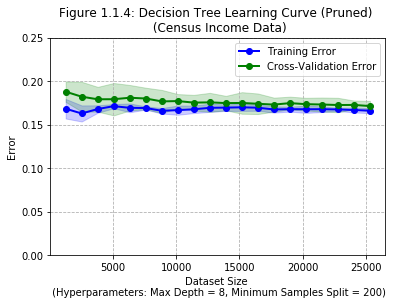

In [11]:
plot_learning_curve(dt_lc2_train_sizes, dt_lc2_train_scores, dt_lc2_validation_scores, 
                    "Figure 1.1.4: Decision Tree Learning Curve (Pruned) \n (Census Income Data)", "Dataset Size \n (Hyperparameters: Max Depth = 8, Minimum Samples Split = 200)")

In [12]:
#randomize using GT ID
np.random.seed(gtid())
clf = DecisionTreeClassifier(max_depth = 8, min_samples_split = 450)
evaluate_tuned_classifier(clf, X_train, Y_train, X_test, Y_test, "Decision Tree")

Training Time (s)  :  0.2005
Prediction Time (s):  0.0050
------------------------------
Confusion Matrix: 
 [[9242  966]
 [1413 1946]]
Accuracy  :  0.8246
Precision :  0.6683
Recall    :  0.5793
F1        :  0.6206
AUC       :  0.7424


### Classifier 2 : Neural Networks
Steps in the process:
* Create the learning curves using test data and cross-validation (assumed 5 hidden layers with 10 nodes each and a learning rate of 0.2)
* Create Validation curves on 2 hyper parameters to find the best hyper parameter value
* Recreate the Learning Curve with the correct values of the hyper parameters
* After tuning the classifier using the two found hyper-parameters, use the classifier to predict the results and collect metrics 

In [13]:
print("Neural Network: Create Learning Curves")
#randomize using GT ID
np.random.seed(gtid())
#nn_classifier = MLPClassifier(hidden_layer_sizes=(10,10,10,10,10), learning_rate_init = 0.1)
nn_classifier = MLPClassifier()
cv = KFold(n_splits = 5, shuffle = True)
nn_lc1_train_sizes, nn_lc1_train_scores, nn_lc1_validation_scores = learning_curve(
    nn_classifier, X_train, Y_train, train_sizes = np.linspace(0.05, 1.0, 20), cv = cv, scoring = make_scorer(accuracy_score), n_jobs=4)
print("Neural Network: Done learning curve")

Neural Network: Create Learning Curves
Neural Network: Done learning curve


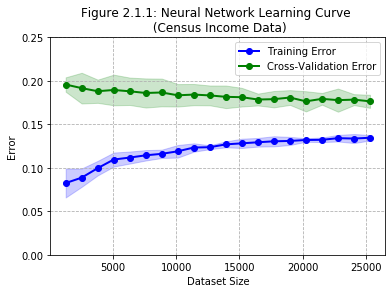

In [14]:
plot_learning_curve(nn_lc1_train_sizes, nn_lc1_train_scores, nn_lc1_validation_scores, 
                    "Figure 2.1.1: Neural Network Learning Curve \n (Census Income Data)")

In [15]:
print("Neural Network: Tuning Hyper Param: Hidden Layer Size")
#randomize using GT ID
np.random.seed(gtid())
nn_classifier = MLPClassifier()
nn_hp1_param_range = param_range = np.linspace(5,150,30).astype('int') 
cv = KFold(n_splits = 5, shuffle = False)
nn_hp1_train_scores, nn_hp1_test_scores = validation_curve(nn_classifier, X_train, Y_train, param_name = "hidden_layer_sizes", 
                                             param_range = nn_hp1_param_range, cv = cv, scoring = make_scorer(accuracy_score), n_jobs=4)

print("Neural Network: Done tuning Hyper Param: Hidden Layer Size")

Neural Network: Tuning Hyper Param: Hidden Layer Size
Neural Network: Done tuning Hyper Param: Hidden Layer Size


Hyperparameter: Hidden Layer Size 15
CV Error:  0.16664034117832888


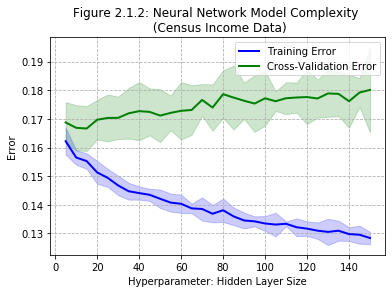

In [16]:
plot_validation_curve(nn_hp1_param_range, nn_hp1_train_scores, nn_hp1_test_scores, 
                      "Figure 2.1.2: Neural Network Model Complexity \n (Census Income Data)", "Hyperparameter: Hidden Layer Size")

In [56]:
print("Neural Network: Tuning Hyper Param: Learning Rate")
#randomize using GT ID
np.random.seed(gtid())
nn_classifier = MLPClassifier(hidden_layer_sizes=(15))
nn_hp2_param_range = np.arange(.05, .5, .05) 
cv = KFold(n_splits = 5, shuffle = False)
nn_hp2_train_scores, nn_hp2_test_scores = validation_curve(nn_classifier, X_train, Y_train, param_name = "learning_rate_init", 
                                             param_range = nn_hp2_param_range, cv = cv, scoring = make_scorer(accuracy_score), n_jobs=4)

print("Neural Network: Done tuning Hyper Param: Learning Rate")

Neural Network: Tuning Hyper Param: Learning Rate
Neural Network: Done tuning Hyper Param: Learning Rate


Hyperparameter: Learning Rate 0.05
CV Error:  0.17011530563891958


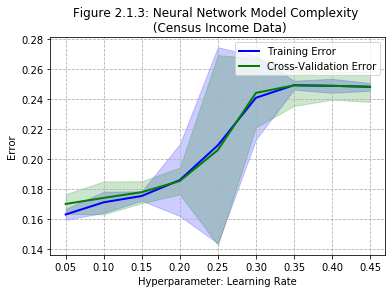

In [57]:
plot_validation_curve(nn_hp2_param_range, nn_hp2_train_scores, nn_hp2_test_scores, 
                      "Figure 2.1.3: Neural Network Model Complexity \n (Census Income Data)", "Hyperparameter: Learning Rate")

In [19]:
#Commented as this takes a long time to run and the results are below:
'''
h_units = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
learning_rates = [.1, .15, .2]
param_grid = {'hidden_layer_sizes': h_units, 'learning_rate_init': learning_rates}
print("Neural Network: Grid Search")
net = GridSearchCV(estimator = MLPClassifier(solver='adam',activation='logistic',random_state=10),
                       param_grid=param_grid, cv=5)
net.fit(X_train, Y_train)
print("Best parameters are:")
print(net.best_params_)
'''

'\nh_units = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]\nlearning_rates = [.1, .15, .2]\nparam_grid = {\'hidden_layer_sizes\': h_units, \'learning_rate_init\': learning_rates}\nprint("Neural Network: Grid Search")\nnet = GridSearchCV(estimator = MLPClassifier(solver=\'adam\',activation=\'logistic\',random_state=10),\n                       param_grid=param_grid, cv=5)\nnet.fit(X_train, Y_train)\nprint("Best parameters are:")\nprint(net.best_params_)\n'

In [58]:
print("Neural Network: Create Learning Curve on tuned classifier")
#randomize using GT ID
np.random.seed(gtid())
nn_classifier = MLPClassifier(solver='adam',activation='logistic', hidden_layer_sizes=(15), learning_rate_init = 0.05)
cv = KFold(n_splits = 5, shuffle = True)
nn_lc2_train_sizes, nn_lc2_train_scores, nn_lc2_validation_scores = learning_curve(
    nn_classifier, X_train, Y_train, train_sizes = np.linspace(0.05, 1.0, 20), cv = cv, scoring = make_scorer(accuracy_score), n_jobs=4)
print("Neural Network: Done with learning curve")

Neural Network: Create Learning Curve on tuned classifier
Neural Network: Done with learning curve


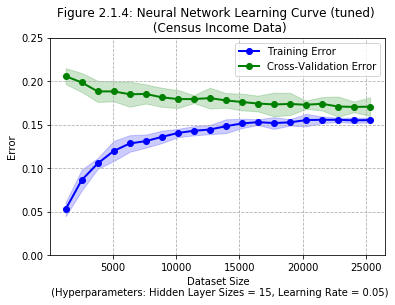

In [59]:
plot_learning_curve(nn_lc2_train_sizes, nn_lc2_train_scores, nn_lc2_validation_scores, 
                    "Figure 2.1.4: Neural Network Learning Curve (tuned) \n (Census Income Data)",
                   xlabel = "Dataset Size\n (Hyperparameters: Hidden Layer Sizes = 15, Learning Rate = 0.05)")

In [60]:
#randomize using GT ID
np.random.seed(gtid())
clf = MLPClassifier(solver='adam',activation='logistic', hidden_layer_sizes=(15), learning_rate_init = 0.05)
evaluate_tuned_classifier(clf, X_train, Y_train, X_test, Y_test, "Neural Network")

Training Time (s)  :  4.1983
Prediction Time (s):  0.0063
------------------------------
Confusion Matrix: 
 [[9334  874]
 [1406 1953]]
Accuracy  :  0.8319
Precision :  0.6908
Recall    :  0.5814
F1        :  0.6314
AUC       :  0.7479


### Classifier 3 : Boosting
Steps in the process:
* Create the learning curves using test data and cross-validation (assumed 5 hidden layers with 10 nodes each and a learning rate of 0.2)
* Create Validation curves on 2 hyper parameters to find the best hyper parameter value
* Recreate the Learning Curve with the correct values of the hyper parameters
* After tuning the classifier using the two found hyper-parameters, use the classifier to predict the results and collect metrics 

In [23]:
print("Boosting: Create Learning Curves")
#randomize using GT ID
np.random.seed(gtid())
boosting_classifier = GradientBoostingClassifier()
cv = KFold(n_splits = 5, shuffle = True)
b_lc1_train_sizes, b_lc1_train_scores, b_lc1_validation_scores = learning_curve(
    boosting_classifier, X_train, Y_train, train_sizes = np.linspace(0.05, 1.0, 20), cv = cv, scoring = make_scorer(accuracy_score), n_jobs=4)
print("Boosting: Done learning curve")

Boosting: Create Learning Curves
Boosting: Done learning curve


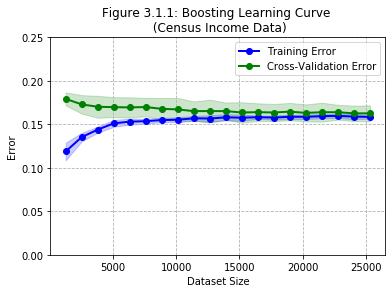

In [24]:
plot_learning_curve(b_lc1_train_sizes, b_lc1_train_scores, b_lc1_validation_scores, "Figure 3.1.1: Boosting Learning Curve \n (Census Income Data)")

In [25]:
print("Boosting: Tuning Hyper Param: Number of Estimators")
#randomize using GT ID
np.random.seed(gtid())
boosting_classifier = GradientBoostingClassifier()
b_hp1_param_range = np.arange(5,200,10) 
cv = KFold(n_splits = 5, shuffle = False)
b_hp1_train_scores, b_hp1_test_scores = validation_curve(boosting_classifier, X_train, Y_train, param_name = "n_estimators", 
                                             param_range = b_hp1_param_range, cv = cv, scoring = make_scorer(accuracy_score), n_jobs=4)

print("Boosting: Done tuning Hyper Param: Number of Estimators")

Boosting: Tuning Hyper Param: Number of Estimators
Boosting: Done tuning Hyper Param: Number of Estimators


Hyperparameter: Number of Estimators 105
CV Error:  0.16247038382561996


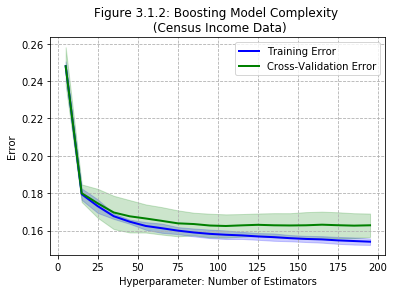

In [26]:
plot_validation_curve(b_hp1_param_range, b_hp1_train_scores, b_hp1_test_scores, 
                      "Figure 3.1.2: Boosting Model Complexity \n (Census Income Data)", "Hyperparameter: Number of Estimators")

In [27]:
print("Boosting: Tuning Hyper Param: Min Samples Leaf")
#randomize using GT ID
np.random.seed(gtid())
boosting_classifier = GradientBoostingClassifier()
b_hp2_param_range = np.arange(50,500,50) 
cv = KFold(n_splits = 5, shuffle = False)
b_hp2_train_scores, b_hp2_test_scores = validation_curve(boosting_classifier, X_train, Y_train, param_name = "min_samples_leaf", 
                                             param_range = b_hp2_param_range, cv = cv, scoring = make_scorer(accuracy_score), n_jobs=4)

print("Boosting: Done tuning Hyper Param: Min Samples Leaf")

Boosting: Tuning Hyper Param: Min Samples Leaf
Boosting: Done tuning Hyper Param: Min Samples Leaf


Hyperparameter: Min Samples Leaf 100
CV Error:  0.16269151792765754


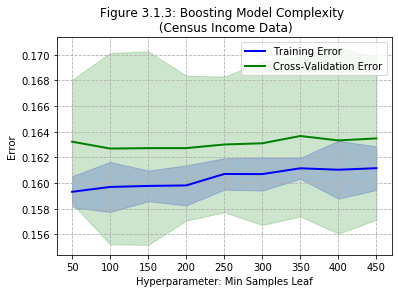

In [28]:
plot_validation_curve(b_hp2_param_range, b_hp2_train_scores, b_hp2_test_scores, 
                      "Figure 3.1.3: Boosting Model Complexity \n (Census Income Data)", "Hyperparameter: Min Samples Leaf")

In [29]:
print("Boosting: Create Learning Curves (tuned)")
#randomize using GT ID
np.random.seed(gtid())
boosting_classifier = GradientBoostingClassifier(n_estimators = 105, min_samples_leaf = 100)
cv = KFold(n_splits = 5, shuffle = True)
b_lc2_train_sizes, b_lc2_train_scores, b_lc2_validation_scores = learning_curve(
    boosting_classifier, X_train, Y_train, train_sizes = np.linspace(0.05, 1.0, 20), cv = cv, scoring = make_scorer(accuracy_score), n_jobs=4)
print("Boosting: Done learning curve")

Boosting: Create Learning Curves (tuned)
Boosting: Done learning curve


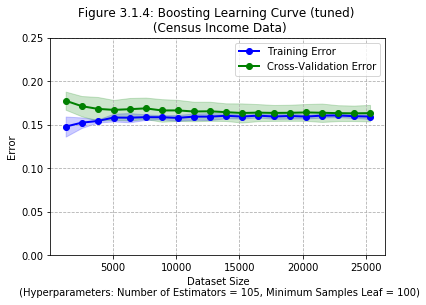

In [30]:
plot_learning_curve(b_lc2_train_sizes, b_lc2_train_scores, b_lc2_validation_scores, 
                    "Figure 3.1.4: Boosting Learning Curve (tuned) \n (Census Income Data)",
                   xlabel = "Dataset Size\n (Hyperparameters: Number of Estimators = 105, Minimum Samples Leaf = 100)")

In [31]:
#randomize using GT ID
np.random.seed(gtid())
clf = GradientBoostingClassifier(n_estimators = 105, min_samples_leaf = 100)
evaluate_tuned_classifier(clf, X_train, Y_train, X_test, Y_test, "Boosting")

Training Time (s)  :  13.0073
Prediction Time (s):  0.0341
------------------------------
Confusion Matrix: 
 [[9431  777]
 [1422 1937]]
Accuracy  :  0.8379
Precision :  0.7137
Recall    :  0.5767
F1        :  0.6379
AUC       :  0.7503


### Classifier 4 : Support Vector Machines
Steps in the process:
* Create the learning curves using test data and cross-validation (assumed 5 hidden layers with 10 nodes each and a learning rate of 0.2)
* Create Validation curves on 2 hyper parameters to find the best hyper parameter value
* Recreate the Learning Curve with the correct values of the hyper parameters
* After tuning the classifier using the two found hyper-parameters, use the classifier to predict the results and collect metrics 

In [32]:
print("SVM: Create Learning Curves")
#randomize using GT ID
np.random.seed(gtid())
svm_classifier = SVC()
cv = KFold(n_splits = 5, shuffle = True)
svm_lc1_train_sizes, svm_lc1_train_scores, svm_lc1_validation_scores = learning_curve(
    svm_classifier, X_train, Y_train, train_sizes = np.linspace(0.05, 1.0, 20), cv = cv, scoring = make_scorer(accuracy_score), n_jobs=4)
print("SVM: Done learning curve")

SVM: Create Learning Curves
SVM: Done learning curve


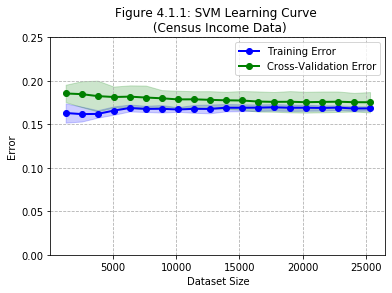

In [33]:
plot_learning_curve(svm_lc1_train_sizes, svm_lc1_train_scores, svm_lc1_validation_scores, "Figure 4.1.1: SVM Learning Curve \n (Census Income Data)")

In [34]:
print("SVM: Tuning Hyper Param: C")
#randomize using GT ID
np.random.seed(gtid())
svm_classifier = SVC()
svm_hp1_param_range = np.arange(1,50,5) 
cv = KFold(n_splits = 5, shuffle = False)
svm_hp1_train_scores, svm_hp1_test_scores = validation_curve(svm_classifier, X_train, Y_train, param_name = "C", 
                                             param_range = svm_hp1_param_range, cv = cv, scoring = make_scorer(accuracy_score), n_jobs=4)

print("SVM: Done tuning Hyper Param: C")

SVM: Tuning Hyper Param: C
SVM: Done tuning Hyper Param: C


Hyperparameter: C 1
CV Error:  0.17542252408782183


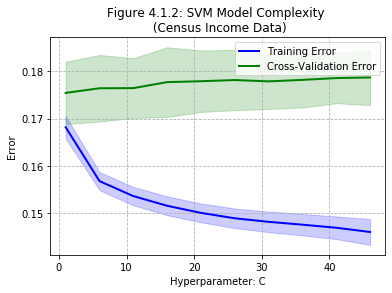

In [35]:
plot_validation_curve(svm_hp1_param_range, svm_hp1_train_scores, svm_hp1_test_scores, 
                      "Figure 4.1.2: SVM Model Complexity \n (Census Income Data)", "Hyperparameter: C")

In [36]:
print("SVM: Tuning Hyper Param: Kernel")
#randomize using GT ID
np.random.seed(gtid())
svm_classifier = SVC()
svm_hp2_param_range = ['linear','poly','rbf','sigmoid'] 
cv = KFold(n_splits = 5, shuffle = False)
svm_hp2_train_scores, svm_hp2_test_scores = validation_curve(svm_classifier, X_train, Y_train, param_name = "kernel", 
                                             param_range = svm_hp2_param_range, cv = cv, scoring = make_scorer(accuracy_score), n_jobs=4)

print("SVM: Done tuning Hyper Param: Kernel")

SVM: Tuning Hyper Param: Kernel
SVM: Done tuning Hyper Param: Kernel


Hyperparameter: Kernel rbf
CV Error:  0.17542252408782183


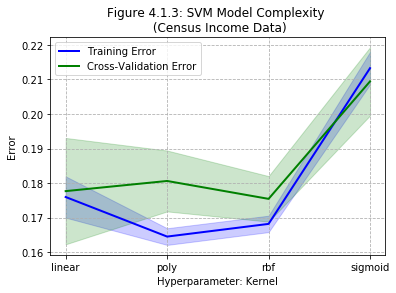

In [37]:
plot_validation_curve(svm_hp2_param_range, svm_hp2_train_scores, svm_hp2_test_scores, 
                      "Figure 4.1.3: SVM Model Complexity \n (Census Income Data)", "Hyperparameter: Kernel")

In [38]:
print("SVM: Create Learning Curves (tuned)")
#randomize using GT ID
np.random.seed(gtid())
svm_classifier = SVC(C = 1, kernel = "rbf")
cv = KFold(n_splits = 5, shuffle = True)
svm_lc2_train_sizes, svm_lc2_train_scores, svm_lc2_validation_scores = learning_curve(
    svm_classifier, X_train, Y_train, train_sizes = np.linspace(0.05, 1.0, 20), cv = cv, scoring = make_scorer(accuracy_score), n_jobs=4)
print("SVM: Done learning curve")

SVM: Create Learning Curves (tuned)


C:\ProgramData\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


SVM: Done learning curve


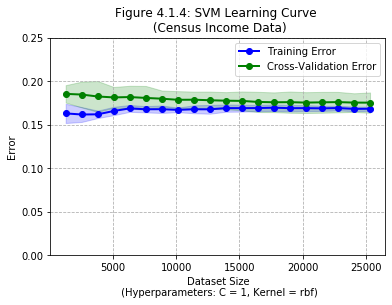

In [39]:
plot_learning_curve(svm_lc2_train_sizes, svm_lc2_train_scores, svm_lc2_validation_scores, 
                    "Figure 4.1.4: SVM Learning Curve \n (Census Income Data)",
                   xlabel = "Dataset Size\n (Hyperparameters: C = 1, Kernel = rbf)")

In [40]:
print("SVM: Create Learning Curves (tuned) - kernel 2")
#randomize using GT ID
np.random.seed(gtid())
svm_classifier = SVC(C = 1, kernel = "sigmoid")
cv = KFold(n_splits = 5, shuffle = True)
svm_lc3_train_sizes, svm_lc3_train_scores, svm_lc3_validation_scores = learning_curve(
    svm_classifier, X_train, Y_train, train_sizes = np.linspace(0.05, 1.0, 20), cv = cv, scoring = make_scorer(accuracy_score), n_jobs=4)
print("SVM: Done learning curve")

SVM: Create Learning Curves (tuned) - kernel 2
SVM: Done learning curve


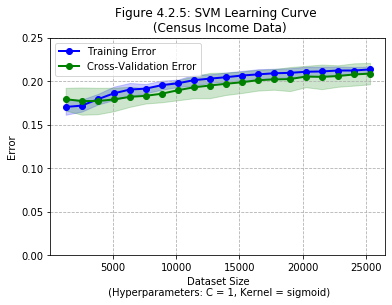

In [41]:
plot_learning_curve(svm_lc3_train_sizes, svm_lc3_train_scores, svm_lc3_validation_scores, 
                    "Figure 4.2.5: SVM Learning Curve \n (Census Income Data)",
                   xlabel = "Dataset Size\n (Hyperparameters: C = 1, Kernel = sigmoid)")

In [42]:
#randomize using GT ID
np.random.seed(gtid())
clf = SVC(C = 1, kernel = "rbf", gamma = "auto")
evaluate_tuned_classifier(clf, X_train, Y_train, X_test, Y_test, "SVM")

Training Time (s)  :  70.4622
Prediction Time (s):  15.5353
------------------------------
Confusion Matrix: 
 [[9451  757]
 [1599 1760]]
Accuracy  :  0.8263
Precision :  0.6992
Recall    :  0.5240
F1        :  0.5990
AUC       :  0.7249


### Classifier 5 : K Nearest Neighbors
Steps in the process:
* Create the learning curves using test data and cross-validation (default values of kNN)
* Create Validation curves on 2 hyper parameters to find the best hyper parameter value
* Recreate the Learning Curve with the correct values of the hyper parameters
* After tuning the classifier using the two found hyper-parameters, use the classifier to predict the results and collect metrics 

In [43]:
print("kNN: Create Learning Curves")
#randomize using GT ID
np.random.seed(gtid())
knn_classifier = KNeighborsClassifier()
cv = KFold(n_splits = 5, shuffle = True)
knn_lc1_train_sizes, knn_lc1_train_scores, knn_lc1_validation_scores = learning_curve(
    knn_classifier, X_train, Y_train, train_sizes = np.linspace(0.05, 1.0, 20), cv = cv, scoring = make_scorer(accuracy_score), n_jobs=4)
print("kNN: Done learning curve")

kNN: Create Learning Curves
kNN: Done learning curve


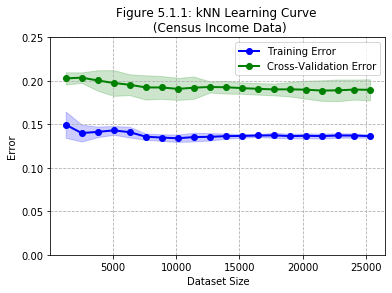

In [44]:
plot_learning_curve(knn_lc1_train_sizes, knn_lc1_train_scores, knn_lc1_validation_scores, 
                    "Figure 5.1.1: kNN Learning Curve \n (Census Income Data)")

In [45]:
print("kNN: Tuning Hyper Param: No of Neighbors")
#randomize using GT ID
np.random.seed(gtid())
knn_classifier = KNeighborsClassifier()
knn_hp1_param_range = np.arange(5,50,3) 
cv = KFold(n_splits = 5, shuffle = False)
knn_hp1_train_scores, knn_hp1_test_scores = validation_curve(knn_classifier, X_train, Y_train, param_name = "n_neighbors", 
                                             param_range = knn_hp1_param_range, cv = cv, scoring = make_scorer(accuracy_score), n_jobs=4)

print("kNN: Done tuning Hyper Param: No of Neighbors")

kNN: Tuning Hyper Param: No of Neighbors
kNN: Done tuning Hyper Param: No of Neighbors


Hyperparameter: Number of Neighbors 47
CV Error:  0.17529616174380036


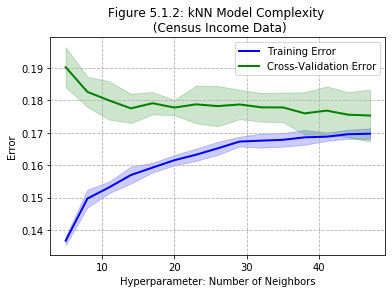

In [46]:
plot_validation_curve(knn_hp1_param_range, knn_hp1_train_scores, knn_hp1_test_scores, 
                      "Figure 5.1.2: kNN Model Complexity \n (Census Income Data)", "Hyperparameter: Number of Neighbors")

In [47]:
print("kNN: Tuning Hyper Param: Leaf Size")
#randomize using GT ID
np.random.seed(gtid())
knn_classifier = KNeighborsClassifier()
knn_hp2_param_range = np.arange(10,100,10) 
cv = KFold(n_splits = 5, shuffle = False)
knn_hp2_train_scores, knn_hp2_test_scores = validation_curve(knn_classifier, X_train, Y_train, param_name = "leaf_size", 
                                             param_range = knn_hp2_param_range, cv = cv, scoring = make_scorer(accuracy_score), n_jobs=4)

print("kNN: Done tuning Hyper Param: Leaf Size")

kNN: Tuning Hyper Param: Leaf Size
kNN: Done tuning Hyper Param: Leaf Size


Hyperparameter: Leaf Size 30
CV Error:  0.19020691833833517


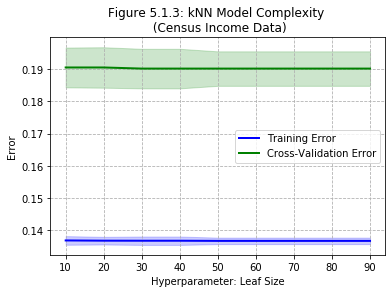

In [48]:
plot_validation_curve(knn_hp2_param_range, knn_hp2_train_scores, knn_hp2_test_scores, 
                      "Figure 5.1.3: kNN Model Complexity \n (Census Income Data)", "Hyperparameter: Leaf Size")

In [49]:
print("kNN: Create Learning Curves on tuned model")
#randomize using GT ID
np.random.seed(gtid())
knn_classifier = KNeighborsClassifier(n_neighbors = 47, leaf_size = 30)
cv = KFold(n_splits = 5, shuffle = True)
train_sizes, train_scores, validation_scores = learning_curve(
    knn_classifier, X_train, Y_train, train_sizes = np.linspace(0.05, 1.0, 20), cv = cv, scoring = make_scorer(accuracy_score), n_jobs=4)
print("kNN: Done learning curve on tuned model")

kNN: Create Learning Curves on tuned model
kNN: Done learning curve on tuned model


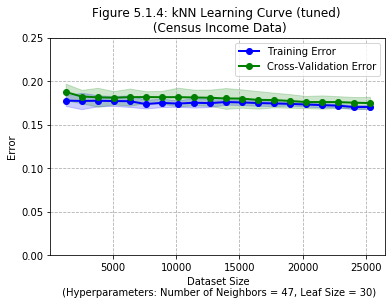

In [50]:
plot_learning_curve(train_sizes, train_scores, validation_scores, 
                    "Figure 5.1.4: kNN Learning Curve (tuned) \n (Census Income Data)",
                   xlabel = "Dataset Size\n (Hyperparameters: Number of Neighbors = 47, Leaf Size = 30)")

In [51]:
#randomize using GT ID
np.random.seed(gtid())
clf = KNeighborsClassifier(n_neighbors = 14, leaf_size = 25)
evaluate_tuned_classifier(clf, X_train, Y_train, X_test, Y_test, "kNN")

Training Time (s)  :  1.6959
Prediction Time (s):  48.8408
------------------------------
Confusion Matrix: 
 [[9418  790]
 [1565 1794]]
Accuracy  :  0.8264
Precision :  0.6943
Recall    :  0.5341
F1        :  0.6037
AUC       :  0.7283


## 4. Conclusion

Finally we will evaluate the training times across the different classifiers for increasing training sizes

In [64]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

def get_cross_validate_scores(classifier, X, Y, title = "Title"):
    data_size = len(Y)
    training_sizes = np.arange(0.05, 1.01, 0.05)
    
    i = 0
    
    train_times=np.zeros(20)
    train_scores=np.zeros(20)
    cv_times=np.zeros(20)
    cv_scores=np.zeros(20)
    train_sizes = np.zeros(20)

    for sub in training_sizes:
        mask = np.random.rand(len(X)) < sub
        X_train = X[mask]
        Y_train = Y[mask]
        train_sizes[i] = len(X_train)
        scores = cross_validate(classifier, X_train, Y_train, cv = 5, scoring = make_scorer(f1_score), return_train_score = True, n_jobs = 4)
        train_times[i] = np.mean(scores['fit_time'])
        train_scores[i] = np.mean(scores['train_score'])
        cv_times[i] = np.mean(scores['score_time'])
        cv_scores[i] = np.mean(scores['test_score'])
        i = i + 1
    return train_times, train_scores, cv_times, cv_scores, train_sizes

def plot_comparison_curves(train_sizes, clf1, clf2, clf3, clf4, clf5, title, xlabel, ylabel):
    lw = 2
    #print(train_sizes)
    labels=["Decision Tree", "Neural Network", "Boosting", "SVM", "kNN"]
    plt.plot(train_sizes, clf1, 'o-', color="b",label=labels[0],  lw=lw)
    plt.plot(train_sizes, clf2, 'o-', color="g",label=labels[1],  lw=lw)
    plt.plot(train_sizes, clf3, 'o-', color="r",label=labels[2],  lw=lw)
    plt.plot(train_sizes, clf4, 'o-', color="c",label=labels[3],  lw=lw)
    plt.plot(train_sizes, clf5, 'o-', color="m",label=labels[4],  lw=lw)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc="best")
    plt.grid(True, linestyle = "--")
    plt.show()  

In [61]:
#randomize using GT ID
np.random.seed(gtid())
clf1 = DecisionTreeClassifier(max_depth = 8, min_samples_split = 200)
np.random.seed(gtid())
clf2 = MLPClassifier(solver='adam',activation='logistic', hidden_layer_sizes=(15), learning_rate_init = 0.05)
np.random.seed(gtid())
clf3 = GradientBoostingClassifier(n_estimators = 105, min_samples_leaf = 100)
np.random.seed(gtid())
clf4 = SVC(C = 1, kernel = "rbf", gamma = "auto")
np.random.seed(gtid())
clf5 = KNeighborsClassifier(n_neighbors = 47, leaf_size = 30)

In [62]:
print("Classifier 1 time: Start")
clf1_train_times, clf1_train_scores, clf1_cv_times, clf1_cv_scores, clf1_train_sizes = get_cross_validate_scores(clf1, X_train, Y_train)
print("Classifier 1 time: End")

print("Classifier 2 time: Start")
clf2_train_times, clf2_train_scores, clf2_cv_times, clf2_cv_scores, clf2_train_sizes = get_cross_validate_scores(clf2, X_train, Y_train)
print("Classifier 2 time: End")

print("Classifier 3 time: Start")
clf3_train_times, clf3_train_scores, clf3_cv_times, clf3_cv_scores, clf3_train_sizes = get_cross_validate_scores(clf3, X_train, Y_train)
print("Classifier 3 time: End")

print("Classifier 4 time: Start")
clf4_train_times, clf4_train_scores, clf4_cv_times, clf4_cv_scores, clf4_train_sizes = get_cross_validate_scores(clf4, X_train, Y_train)
print("Classifier 4 time: End")

print("Classifier 5 time: Start")
clf5_train_times, clf5_train_scores, clf5_cv_times, clf5_cv_scores, clf5_train_sizes = get_cross_validate_scores(clf5, X_train, Y_train)
print("Classifier 5 time: End")

Classifier 1 time: Start
Classifier 1 time: End
Classifier 2 time: Start
Classifier 2 time: End
Classifier 3 time: Start
Classifier 3 time: End
Classifier 4 time: Start
Classifier 4 time: End
Classifier 5 time: Start
Classifier 5 time: End


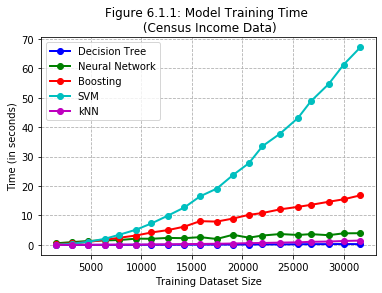

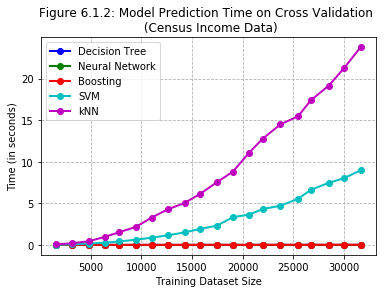

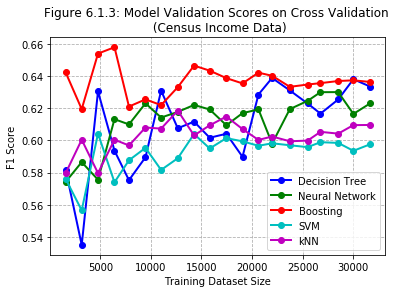

In [65]:
#plot curves
plot_comparison_curves(clf1_train_sizes, clf1_train_times, clf2_train_times, clf3_train_times, clf4_train_times, 
                       clf5_train_times, "Figure 6.1.1: Model Training Time \n (Census Income Data)", "Training Dataset Size", "Time (in seconds)")

plot_comparison_curves(clf1_train_sizes, clf1_cv_times, clf2_cv_times, clf3_cv_times, clf4_cv_times, 
                       clf5_cv_times, "Figure 6.1.2: Model Prediction Time on Cross Validation \n (Census Income Data)", "Training Dataset Size", "Time (in seconds)")

plot_comparison_curves(clf1_train_sizes, clf1_cv_scores, clf2_cv_scores, clf3_cv_scores, clf4_cv_scores, 
                       clf5_cv_scores, "Figure 6.1.3: Model Validation Scores on Cross Validation \n (Census Income Data)", "Training Dataset Size", "F1 Score")

## Cleaning up
In this section I will create another chart which will track the training time per epoch for Artificial Neural Network

In [66]:
param_range = np.arange(50, 1001, 50)
i = 0
train_times=np.zeros(20)
for sub in param_range:
    print("Iteration: ", i, " Size: ", sub)
    np.random.seed(gtid())
    clf = MLPClassifier(solver='adam',activation='logistic', hidden_layer_sizes=(45), learning_rate_init = 0.05, max_iter = sub)
    scores = cross_validate(clf, X_train, Y_train, cv = 5, scoring = make_scorer(f1_score), return_train_score = True, n_jobs = 4)
    train_times[i] = np.mean(scores['fit_time'])
    i = i + 1


Iteration:  0  Size:  50
Iteration:  1  Size:  100
Iteration:  2  Size:  150
Iteration:  3  Size:  200
Iteration:  4  Size:  250
Iteration:  5  Size:  300
Iteration:  6  Size:  350
Iteration:  7  Size:  400
Iteration:  8  Size:  450
Iteration:  9  Size:  500
Iteration:  10  Size:  550
Iteration:  11  Size:  600
Iteration:  12  Size:  650
Iteration:  13  Size:  700
Iteration:  14  Size:  750
Iteration:  15  Size:  800
Iteration:  16  Size:  850
Iteration:  17  Size:  900
Iteration:  18  Size:  950
Iteration:  19  Size:  1000


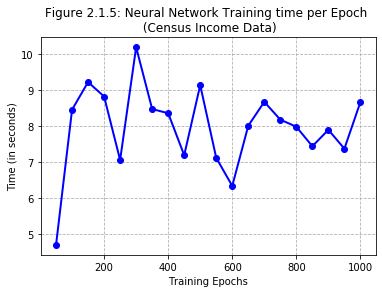

In [67]:
#plot chart
lw = 2
#print(train_sizes)
labels=["Decision Tree", "Neural Network", "Boosting", "SVM", "kNN"]
plt.plot(param_range, train_times, 'o-', color="b",  lw=lw)

plt.title("Figure 2.1.5: Neural Network Training time per Epoch \n (Census Income Data)")
plt.xlabel("Training Epochs")
plt.ylabel("Time (in seconds)")
#plt.legend(loc="best")
plt.grid(True, linestyle = "--")
plt.show()  